In [4]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
from irreducible_library import relic, relic_ann, relic_plas
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:87: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: invalid value encountered in sqrt
  2*T/(3*np

In [5]:
def relic_ann(Q, mx, whole_shebang=False, muon=True, noQ = False):
    """ 
    Given a value of Q and mx returns the number density over relic abundance due to e+e- annihilations.
    """
    Tlist = np.logspace(2.5, -5,num=500)
    gamma_list = [irr.gamma_ann(Q, mx, i,muon=muon, noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5,num=500)
    
    if noQ:
        # This section is for plotting lines of constant abundance by solving a modified boltzmann
        # equation and not using scaling arguments.
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-30))], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(np.squeeze(gulu[-1]))/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3

def relic_plas(Q, mx, whole_shebang=False, noQ = False, IC = False):
    
    Tlist = np.logspace(2.5, -5, num = 500)
    gamma_list = [irr.gamma_long(Q, mx, i, noQ = noQ)+irr.gamma_trans(Q, mx, i,noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5, num = 500)
    
    if noQ:
        # This section is for plotting lines of constant abundance by solving a modified boltzmann
        # equation and not using scaling arguments.
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [-100], alist)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(np.squeeze(gulu[-1]))/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3


In [6]:
#relic40_new =relic(3.6e-11, 0.04, whole_shebang=True)
#relic40_old = old_relic(3.6e-11, 0.04,whole_shebang = True)
relic_ann40m13 = relic_ann(3.6e-13, 4e-6,whole_shebang = True)
relic_ann40m15 = relic_ann(3.6e-15, 4e-6,whole_shebang = True)
relic_ann40m17 = relic_ann(3.6e-17, 4e-6,whole_shebang = True)
#relic_ann40_old = old_relic_ann(3.6e-11, 0.04,whole_shebang = True)
#relic_plas40_new = relic_plas(3.6e-11, 0.04,whole_shebang = True)
#relic_plas40_old = old_relic_plas(3.6e-11, 0.04,whole_shebang = True)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.2600487869998D-40
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.3077697571830D-41
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-41
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-41
 lsoda--  warning..internal t (=r1) 

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.2600487869998D-32
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.3077697571830D-33
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-33
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-33
 lsoda--  warning..internal t (=r1) 

In [69]:
relic_ann40m13IC = relic_ann(3.6e-13, 4e-6,whole_shebang = True, IC = True)
relic_ann40m15IC = relic_ann(3.6e-15, 4e-6,whole_shebang = True, IC = True)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.2600487869998D-40
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.3077697571830D-41
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-41
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1258925411794D-01   r2 =  0.6155395143660D-41
 lsoda--  warning..internal t (=r1) 

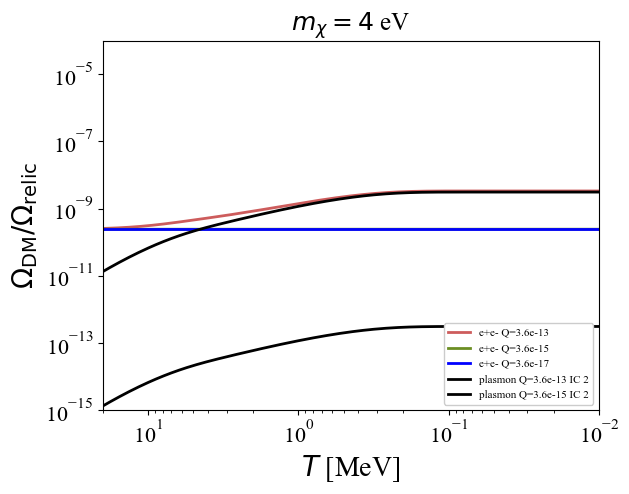

In [70]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_ann40m13/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'e+e- Q=3.6e-13')
ax.loglog(irr.T(alist), relic_ann40m15/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'e+e- Q=3.6e-15')
ax.loglog(irr.T(alist), relic_ann40m17/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='blue',label = r'e+e- Q=3.6e-17')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)
ax.loglog(irr.T(alist), relic_ann40m13IC/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='k',label = r'plasmon Q=3.6e-13 IC 2')
ax.loglog(irr.T(alist), relic_ann40m15IC/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='k',label = r'plasmon Q=3.6e-15 IC 2')

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 4$ eV', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([10e-16, 10e-5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.04, 1), 1e-4,1e2, color='gray',linestyles=":")
#ax.vlines(irr.me, 1e-4,1e2,color='gray',linestyles=":")

#ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


In [23]:
relic_plas40m13 = relic_plas(3.6e-13, 4e-6,whole_shebang = True)
relic_plas40m15 = relic_plas(3.6e-15, 4e-6,whole_shebang = True)
relic_plas40m17 = relic_plas(3.6e-17, 4e-6,whole_shebang = True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:452: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[1.11586188e-07]
[1.85823298e-08]
[1.85729027e-08]


In [72]:
relic_plas40m13IC = relic_plas(3.6e-13, 4e-6,whole_shebang = True, IC = True)
relic_plas40m15IC = relic_plas(3.6e-15, 4e-6,whole_shebang = True, IC = True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:452: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[9.30128012e-08]
[9.30301283e-12]


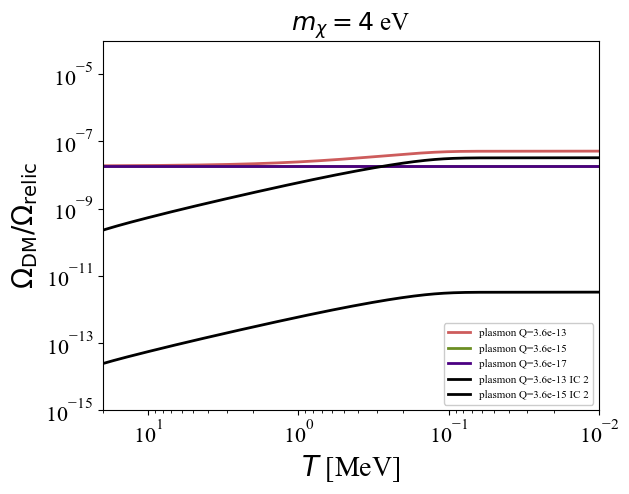

In [73]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_plas40m13/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'plasmon Q=3.6e-13')
ax.loglog(irr.T(alist), relic_plas40m15/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='olivedrab',label = r'plasmon Q=3.6e-15')
ax.loglog(irr.T(alist), relic_plas40m17/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='indigo',label = r'plasmon Q=3.6e-17')
ax.loglog(irr.T(alist), relic_plas40m13IC/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='k',label = r'plasmon Q=3.6e-13 IC 2')
ax.loglog(irr.T(alist), relic_plas40m15IC/irr.nxrelic(4e-6, irr.T(100))*alist**3/100**3,lw=2,c='k',label = r'plasmon Q=3.6e-15 IC 2')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 4$ eV', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([10e-16, 10e-5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.04, 1), 1e-4,1e2, color='gray',linestyles=":")
#ax.vlines(irr.me, 1e-4,1e2,color='gray',linestyles=":")

#ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
#ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


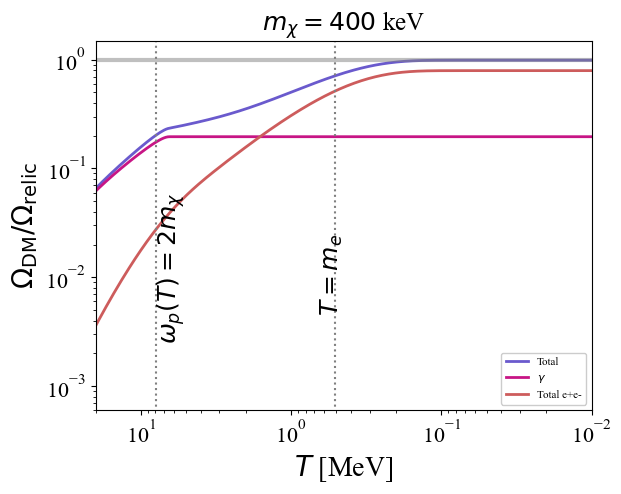

In [20]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
ax.loglog(irr.T(alist), relic40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
ax.loglog(irr.T(alist), relic_plas40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_ann40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'Total e+e-')
ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 400$ keV', fontsize=18)
ax.set_xlim([20,0.01])
ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.4, 1), 1e-4,1e2, color='gray',linestyles=":")
ax.vlines(irr.me, 1e-4,1e2,color='gray',linestyles=":")

ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(8, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)


In [44]:
#relic40_new1 =relic(10**(-15), 0.004, whole_shebang=True)
#relic40_old = old_relic(3.6e-11, 0.04,whole_shebang = True)
#relic_ann40_new1 = relic_ann(10**(-15), 0.004,whole_shebang = True)
#relic_ann40_old = old_relic_ann(3.6e-11, 0.04,whole_shebang = True)
relic_plas40_new1 = relic_plas(10**(-12), 0.001,whole_shebang = True)
#relic_plas40_old = old_relic_plas(3.6e-11, 0.04,whole_shebang = True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:378: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[6.15912745e-05]


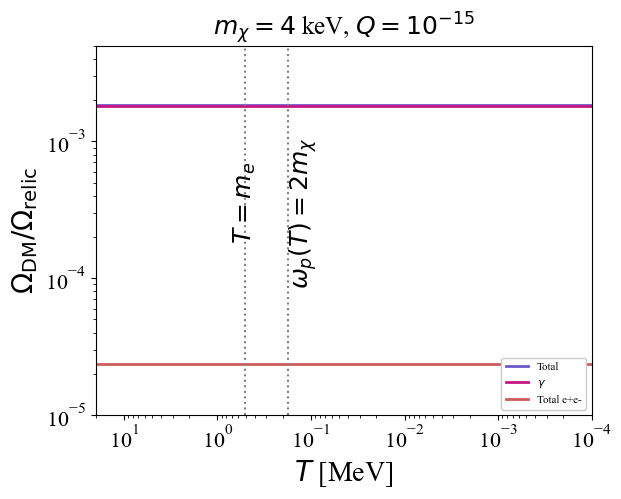

In [43]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
ax.loglog(irr.T(alist), relic40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
ax.loglog(irr.T(alist), relic_plas40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), relic_ann40_new1/irr.nxrelic(0.4, irr.T(100))*alist**3/100**3,lw=2,c='IndianRed',label = r'Total e+e-')
#ax.loglog(irr.T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 4$ keV, $Q = 10^{-15}$', fontsize=18)
ax.set_xlim([20,0.0001])
ax.set_ylim([0.00001, 0.005])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.004, 1), 1e-5,1e-1, color='gray',linestyles=":")
ax.vlines(irr.me, 1e-5,1e-1,color='gray',linestyles=":")

ax.text(0.7, 0.0002, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(0.18, 0.0001, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(framealpha=1, loc='lower right', fontsize=8)

## Initial Condition Determinator:

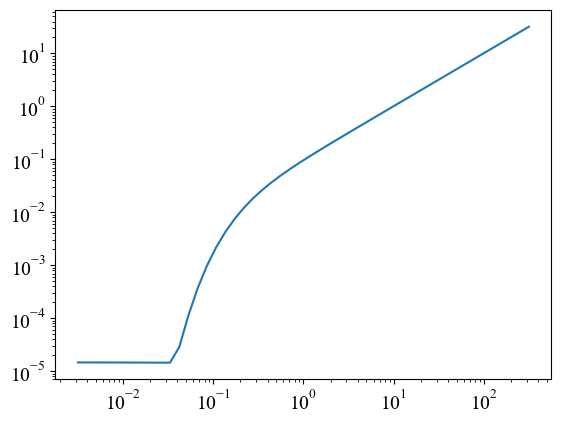

In [8]:
plt.loglog(np.logspace(2.5,-2.5),[irr.wp(i) for i in np.logspace(2.5,-2.5)])

In [5]:
# How long the plasmons are decaying if m_chi = 1eV
print(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.000001, 1))
print(irr.a(0.03073833))

[0.03073833]
45.296429093338205


/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [18]:
relic40_new =relic(3.6e-18, 0.004, whole_shebang=True)
#relic40_old = old_relic(3.6e-11, 0.04,whole_shebang = True)
relic_ann40_new = relic_ann(3.6e-18, 0.004,whole_shebang = True)
#relic_ann40_old = old_relic_ann(3.6e-11, 0.04,whole_shebang = True)
relic_plas40_new = relic_plas(3.6e-18, 0.004,whole_shebang = True)
#relic_plas40_old = old_relic_plas(3.6e-11, 0.04,whole_shebang = True)

[-19.18575366] 0.012589254117941675
[1.88266471e-11]
[-53.47028276] 0.012589254117941675
[3.09608891e-16]
[-19.18575366] 0.012589254117941675
[1.88263122e-11]


In [19]:
print(np.exp(-19.18575366),np.exp(-53.47028276))

4.653000019002387e-09 6.0000000157742275e-24
